# Classification using KNN - Glass

### Prepare a model for glass classification using KNN

#### Data Description:

    RI : refractive index
    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    Mg: Magnesium
    AI: Aluminum
    Si: Silicon
    K:Potassium
    Ca: Calcium
    Ba: Barium
    Fe: Iron

    Type: Type of glass: (class attribute)

    1 -- building_windows_float_processed
    2 --building_windows_non_float_processed
    3 --vehicle_windows_float_processed
    4 --vehicle_windows_non_float_processed (none in this database)
    5 --containers
    6 --tableware
    7 --headlamps


### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# Importing the dataset
glass_data = pd.read_csv("glass.csv")

#### Exploring the dataset

In [3]:
# Displaying first ten records
glass_data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [4]:
# Shape of the data
glass_data.shape

(214, 10)

In [5]:
# Summary of the data
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# Check the data types
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


#### Modifying the dataset

In [7]:
# Renaming the columns
glass_data = glass_data.rename(columns={"Type":"class_type"})
glass_data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


### Step-2.2 : Handling missing values

In [8]:
# Check for Null values
glass_data.isnull().sum()

RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
class_type    0
dtype: int64

In [9]:
# Check for duplicate values
glass_data[glass_data.duplicated()].shape

(1, 10)

In [10]:
glass_data[glass_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class_type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [11]:
# As there is a duplicate observation, remove it from the dataset
glass_data = glass_data.drop_duplicates()

In [12]:
glass_data.reset_index(inplace=True,drop=True)
glass_data.shape

(213, 10)

### Step-2.3 : Exploring data using Visualisation

#### Histogram

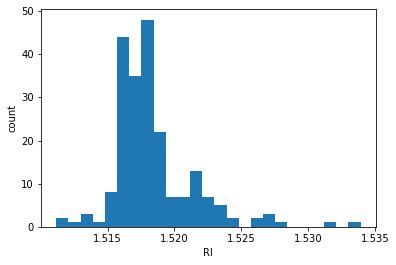

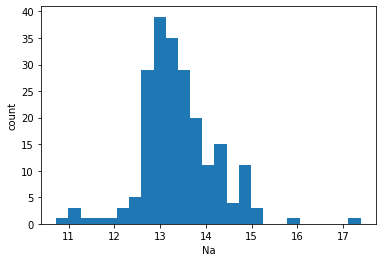

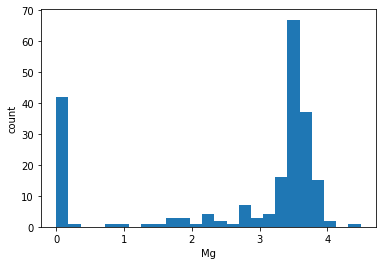

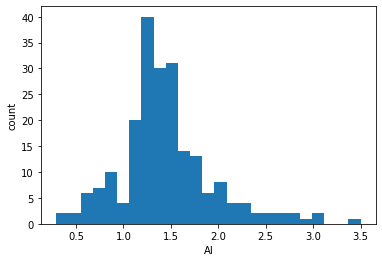

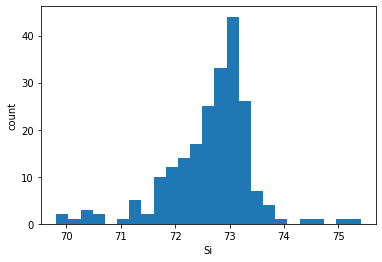

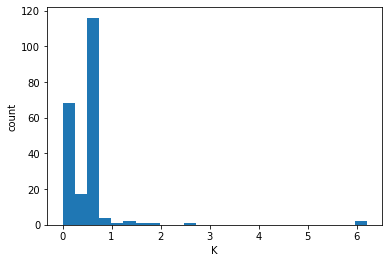

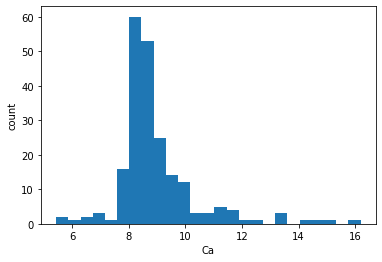

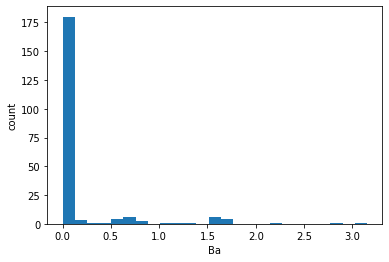

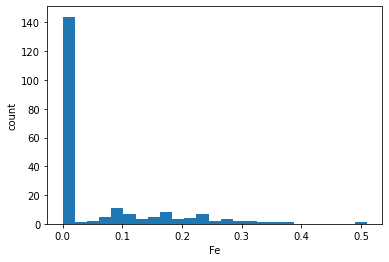

In [13]:
for feature in glass_data.columns[:-1]:
    plt.figure()
    plt.hist(glass_data[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")

#### Correlation and Heat map

In [14]:
# Checking for Correlation between variables
glass_data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class_type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
class_type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


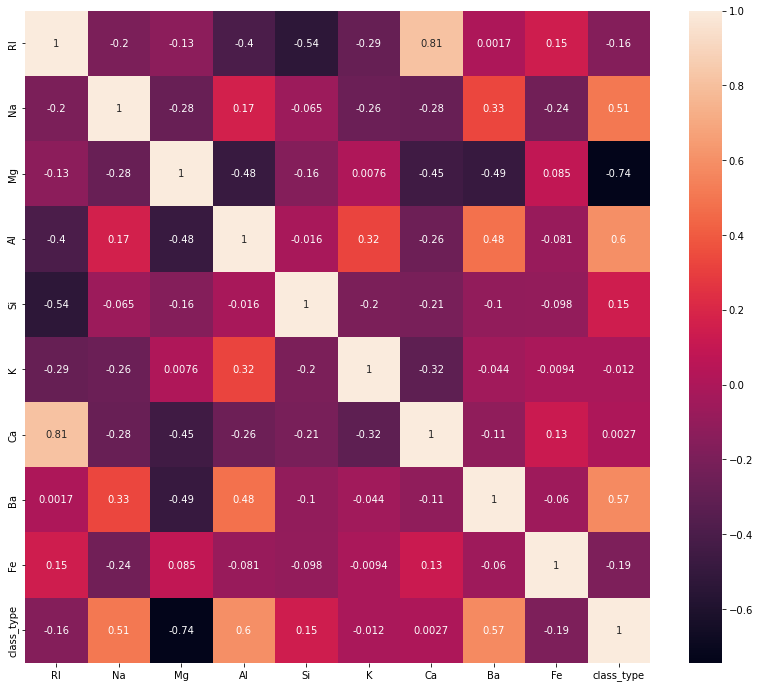

In [15]:
plt.figure(figsize=(14,12))
sb.heatmap(glass_data.corr(),annot=True)
plt.show()

#### Observation
+ We can see that 'RI and 'Ca' have strong correlation.

#### No. of counts in each class

<AxesSubplot:xlabel='class_type', ylabel='count'>

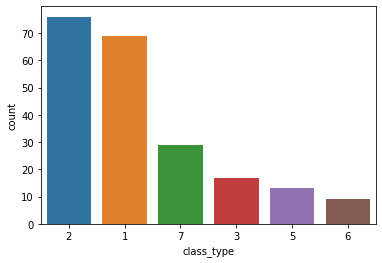

In [16]:
sb.countplot(x=glass_data['class_type'],order=glass_data['class_type'].value_counts().index)

#### Observation
+ Class-2 has highest number of observations

In [17]:
glass_data['class_type'].value_counts().index.tolist()

[2, 1, 7, 3, 5, 6]

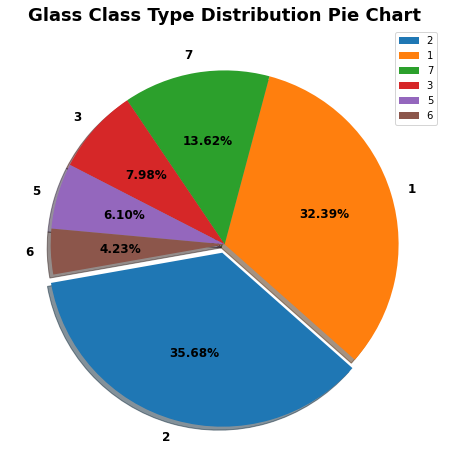

In [18]:
plt.figure(figsize = (12,8))
plt.pie(glass_data['class_type'].value_counts(),
       labels=glass_data['class_type'].value_counts().index.tolist(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Glass Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Step-3 : Pre-Processing the Data

### Step-3.1 : Standardising the data

In [19]:
glass_data_mdf = glass_data.drop(['class_type'],axis=1)
glass_data_mdf.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [20]:
standard_scaler = StandardScaler()
glass_data_std = standard_scaler.fit_transform(glass_data_mdf)
glass_data_std.shape

(213, 9)

### Step-3.2 : Split the data into training and testing data

In [21]:
x = glass_data_std
y = glass_data['class_type']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [23]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train:  (149, 9)
Shape of x_test:  (64, 9)
Shape of y_train:  (149,)
Shape of y_test (64,)


### Step-4 : Build Classifying model using KNN

### Step-4.1 : Build the model assuming no. of neighbors 'K'

In [24]:
num_folds = 10
kfold = KFold(n_splits=10)

In [25]:
model = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model, x_train, y_train, cv=kfold)

In [26]:
print(results.mean())

0.6452380952380953


### Step-4.2 : Grid search for choosing the best Value of K

In [27]:
n_neighbors = np.array([i+2 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)

In [28]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv =10)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21])})

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.678095238095238
{'n_neighbors': 4}


#### Therefore, for K neighbors = 4 we get an accuracy of 67%

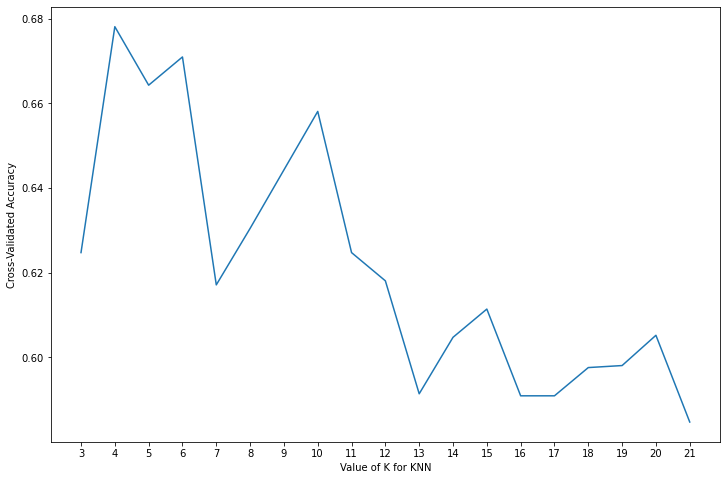

In [30]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 40
k_range = np.array([i+2 for i in range(1,20)])
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

#### Here we can see that the accuracy for K Neighbors = 4 is high.

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=4)
results = cross_val_score(knn_model, x_train, y_train, cv=kfold)

print(results.mean())

0.6519047619047619


In [32]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [33]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      1.00      0.77        20
           2       0.76      0.64      0.70        25
           3       1.00      0.12      0.22         8
           5       0.50      0.50      0.50         2
           6       0.50      0.50      0.50         2
           7       1.00      0.86      0.92         7

    accuracy                           0.70        64
   macro avg       0.73      0.60      0.60        64
weighted avg       0.76      0.70      0.67        64

